In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [22]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)

In [21]:
X_train[0].shape

(784, 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [47]:
model = Sequential()

model.add(Dense(units=256,activation='relu',input_shape = (784,)))
model.add(Dropout(0.2))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)               

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [51]:
model.fit(X_train,y_cat_train,epochs=50,callbacks=[early_stop],validation_data=(X_test,y_cat_test))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5067 - accuracy: 0.8499 - val_loss: 0.1639 - val_accuracy: 0.9545
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2324 - accuracy: 0.9415 - val_loss: 0.1248 - val_accuracy: 0.9673
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1807 - accuracy: 0.9549 - val_loss: 0.1123 - val_accuracy: 0.9710
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1533 - accuracy: 0.9621 - val_loss: 0.1110 - val_accuracy: 0.9724
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1332 - accuracy: 0.9668 - val_loss: 0.1016 - val_accuracy: 0.9756
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1214 - accuracy: 0.9693 - val_loss: 0.1099 - val_accuracy: 0.9724
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1093 - accuracy: 0.9721 - val_loss: 0.0970 - val_accuracy:

In [52]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

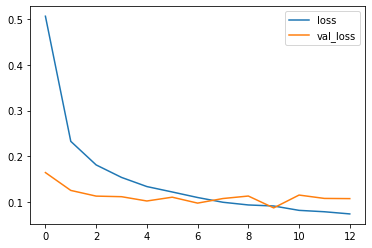

In [53]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

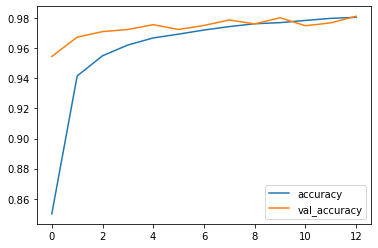

In [54]:
losses[['accuracy','val_accuracy']].plot()

In [55]:
y_pred = model.predict_classes(X_test)

C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [61]:
print(confusion_matrix(y_test,y_pred))

[[ 973    1    0    1    0    1    2    1    1    0]
 [   0 1125    3    1    0    1    1    0    4    0]
 [   2    0 1013    2    1    0    1    8    5    0]
 [   0    0    2  998    0    2    0    3    3    2]
 [   0    4    4    0  958    0    5    1    2    8]
 [   3    1    0    9    1  869    4    1    2    2]
 [   5    3    1    0    3   10  933    0    3    0]
 [   2    3    6    0    0    0    0 1011    4    2]
 [   3    1    2    2    2    1    2    3  955    3]
 [   2    5    0    3   12    3    1    4    2  977]]


In [62]:
model.save('mnist_ANN.h5')